In [21]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform

In [22]:
np.random.seed(42)
p = 0.3
n_estimation = 100
n_cluster = 100
cluster_centers = np.random.rand(n_cluster,2)
binom_sample = stats.binom.rvs(n_estimation, p, size=(n_cluster))

In [23]:
px.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], color=binom_sample)

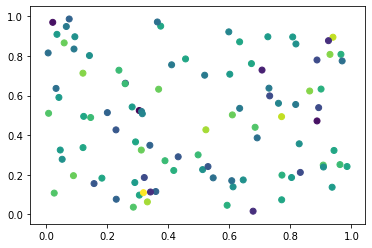

In [24]:
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c=binom_sample)

In [25]:
from BinomialSimilarityGrouping import BSG

In [35]:
bsg = BSG(n_estimation, p, 0.1, 10)
link_matrix = bsg.fit_epsilon(cluster_centers, binom_sample, 0.05)

In [36]:
connections = np.where(link_matrix)
start_points = connections[0]
end_points = connections[1]

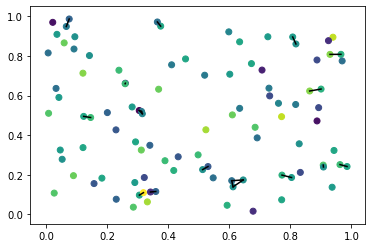

In [37]:
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c=binom_sample)
for idx_point_1, idx_point_2 in zip(start_points, end_points):
    if idx_point_1 < idx_point_2:
        line = np.array([cluster_centers[idx_point_1],cluster_centers[idx_point_2]])
        plt.plot(line[:,0], line[:,1], c="k")

In [38]:
fig = px.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], color=binom_sample)
for idx_point_1, idx_point_2 in zip(start_points, end_points):
    if idx_point_1 < idx_point_2:
        line = np.array([cluster_centers[idx_point_1],cluster_centers[idx_point_2]])
        fig.add_trace(go.Scatter(x=line[:,0], y=line[:,1], mode="lines", line_color="black"))
fig.update_layout(showlegend=False)
fig.show()